In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [106]:
df = pd.read_csv("Ship_Performance_Dataset_with_Clusters.csv")
df

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
0,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3
1,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
2,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,2
3,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3
4,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Good,24.257402,1813.474360,147.964296,10.378736,Moderate,1450.181358,266359.224719,820652.038923,34.433655,0.708172,1.352973,7,51.258697,0
2123,Tanker,Long-haul,Diesel,Critical,15.649207,1662.426557,1175.942724,12.564046,Rough,451.670997,393827.995941,567287.169653,22.281638,0.356031,1.079178,2,92.926949,1
2124,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114,3
2125,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622,3


In [107]:
print(list(df.columns))

['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage', 'cluster']


In [108]:
df["Avg_Speed"] = df["Distance_Traveled_nm"] / (df["Turnaround_Time_hours"] + 1e-6)
df["Cargo_per_nm"] = df["Cargo_Weight_tons"] / (df["Distance_Traveled_nm"] + 1e-6)

In [ ]:
# Exclude irrelevant columns
exclude_cols = {"cluster"}
num_features = [col for col in df.columns if col not in exclude_cols and df[col].dtype in ["int64", "float64"]]

X = df[num_features].fillna(df[num_features].median())
X_scaled = StandardScaler().fit_transform(X)
feature_medians = X.median().to_dict()


In [110]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

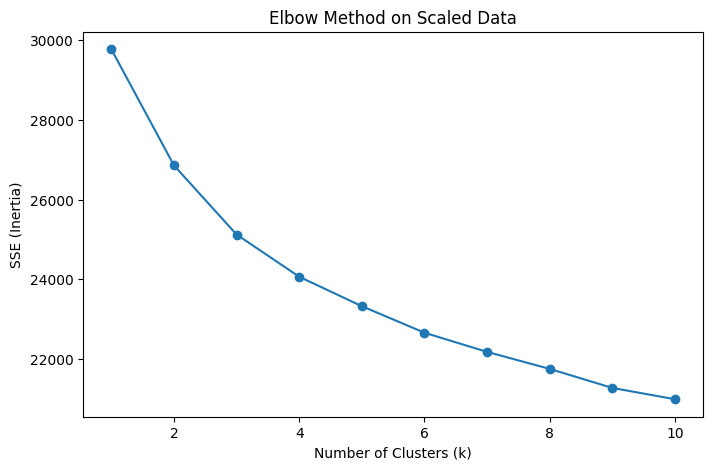

In [111]:
sse = []
k_range = range(1, 11) 

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)  
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method on Scaled Data')
plt.show()


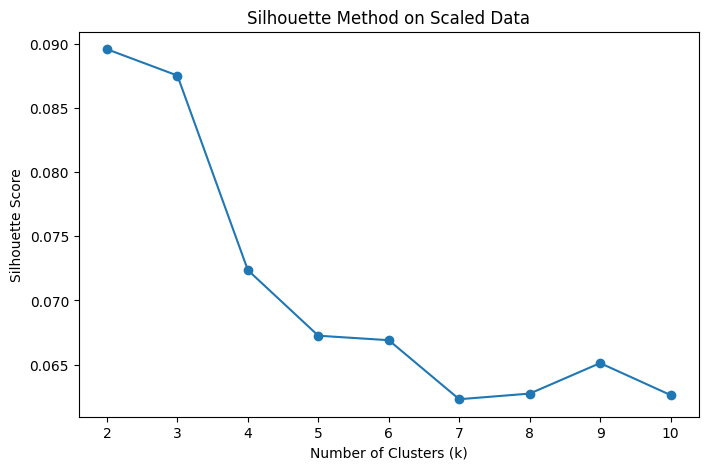

In [112]:
sil_scores = []
k_range = range(2, 11) 
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method on Scaled Data')
plt.show()

In [113]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
y_kmeans = kmeans.fit_predict(X_scaled)  

print("KMeans labels:", y_kmeans[:20])

KMeans labels: [1 1 2 1 0 0 1 1 1 1 1 2 1 2 1 1 2 0 2 2]


In [114]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled) 

print("Hierarchical labels:", y_hc[:20])

Hierarchical labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]


In [115]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled) 

print("DBSCAN labels:", y_dbscan[:20])
if len(set(y_dbscan)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, y_dbscan))
else:
    print("DBSCAN did not form valid clusters (all noise).")


DBSCAN labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
DBSCAN did not form valid clusters (all noise).


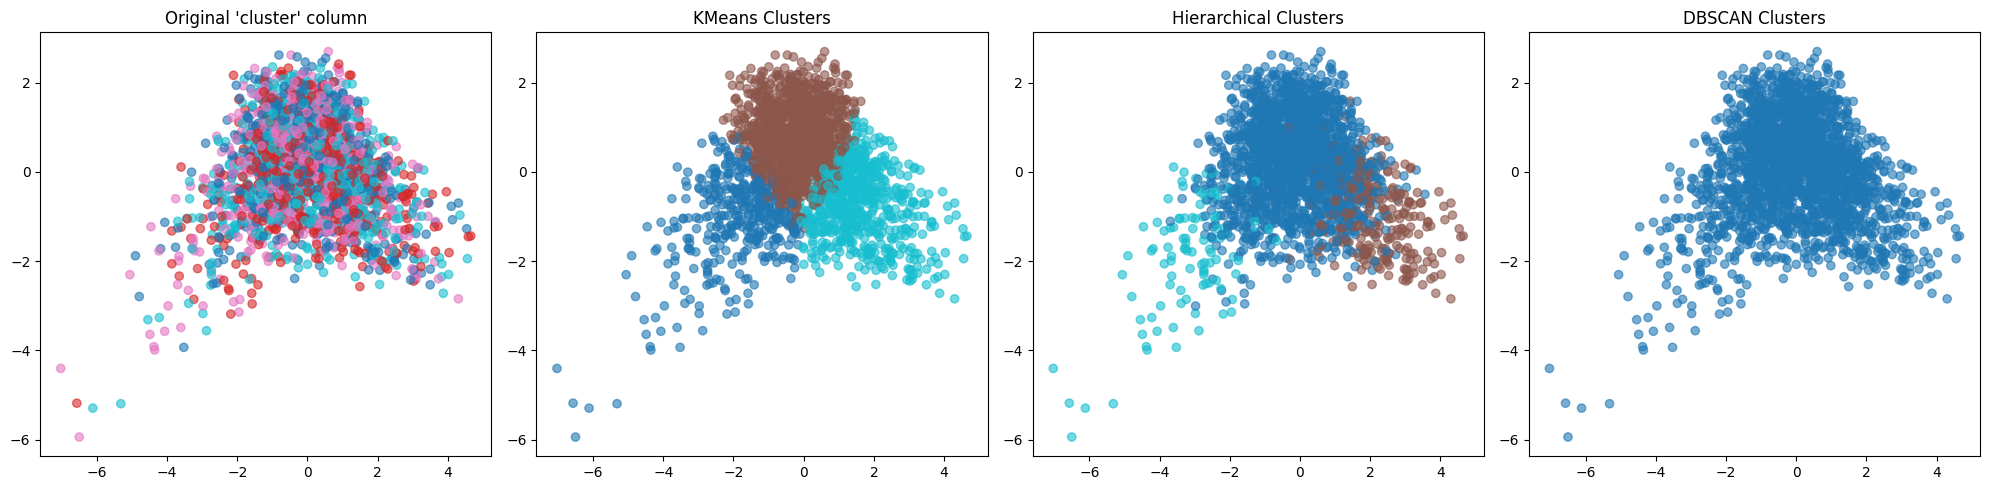

In [116]:
# Visualization
plt.figure(figsize=(20,5))


plt.subplot(1,4,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='tab10', alpha=0.6)
plt.title("Original 'cluster' column")

# KMeans
plt.subplot(1,4,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap='tab10', alpha=0.6)
plt.title("KMeans Clusters")


# Hierarchical
plt.subplot(1,4,3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap='tab10', alpha=0.6)
plt.title("Hierarchical Clusters")

# DBSCAN
plt.subplot(1,4,4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_dbscan, cmap='tab10', alpha=0.6)
plt.title("DBSCAN Clusters")

plt.tight_layout()
plt.show()

In [ ]:
from joblib import dump


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Save everything
dump(kmeans, 'models/Clustering.pkl')     # Trained model
dump(scaler, 'models/scaler.pkl')         # Scaler
dump(pca, 'models/pca.pkl')               # PCA for plotting
dump(num_features, 'models/features.pkl') # List of features
dump(feature_medians, 'models/feature_medians.pkl')  


['models/feature_medians.pkl']

In [ ]:
import pandas as pd

df = pd.read_csv("Ship_Performance_Dataset_with_Clusters.csv")

numeric_features = ["Weekly_Voyage_Count", "Average_Load_Percentage", 
                    "Speed_Over_Ground_knots", "Distance_Traveled_nm", 
                    "Cargo_Weight_tons", "Operational_Cost_USD", 
                    "Revenue_per_Voyage_USD", "Turnaround_Time_hours", 
                    "Engine_Power_kW", "Draft_meters"]


feature_ranges = {}
for col in numeric_features:
    feature_ranges[col] = {"min": df[col].min(), "max": df[col].max()}

print(feature_ranges)


{'Weekly_Voyage_Count': {'min': np.int64(1), 'max': np.int64(9)}, 'Average_Load_Percentage': {'min': np.float64(50.01200504550447), 'max': np.float64(99.95222027935382)}, 'Speed_Over_Ground_knots': {'min': np.float64(10.009755735408916), 'max': np.float64(24.991661381380048)}, 'Distance_Traveled_nm': {'min': np.float64(50.43314996995293), 'max': np.float64(1998.337057363062)}, 'Cargo_Weight_tons': {'min': np.float64(50.229624153089695), 'max': np.float64(1999.1266967989584)}, 'Operational_Cost_USD': {'min': np.float64(10097.439656134193), 'max': np.float64(499734.867868259)}, 'Revenue_per_Voyage_USD': {'min': np.float64(50351.81444747634), 'max': np.float64(999811.927755995)}, 'Turnaround_Time_hours': {'min': np.float64(12.019909271125098), 'max': np.float64(71.97241530051559)}, 'Engine_Power_kW': {'min': np.float64(501.73902696931015), 'max': np.float64(2998.7343286466275)}, 'Draft_meters': {'min': np.float64(5.001946568775687), 'max': np.float64(14.989904826873277)}}
